In [48]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv ('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv')
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lead_source               1334 non-null   object 
 1   industry                  1328 non-null   object 
 2   number_of_courses_viewed  1462 non-null   int64  
 3   annual_income             1281 non-null   float64
 4   employment_status         1362 non-null   object 
 5   location                  1399 non-null   object 
 6   interaction_count         1462 non-null   int64  
 7   lead_score                1462 non-null   float64
 8   converted                 1462 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 102.9+ KB


In [11]:
df.isnull().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [12]:
df.nunique()

lead_source                    5
industry                       7
number_of_courses_viewed      10
annual_income               1267
employment_status              4
location                       7
interaction_count             12
lead_score                   101
converted                      2
dtype: int64

In [13]:
df.describe()


,number_of_courses_viewed,annual_income,interaction_count,lead_score,converted
count,1462.000000,1281.000000,1462.000000,1462.000000,1462.000000
mean,2.031464,59886.273224,2.976744,0.506108,0.619015
std,1.449717,15070.140389,1.681564,0.288465,0.485795
min,0.000000,13929.000000,0.000000,0.000000,0.000000
25%,1.000000,49698.000000,2.000000,0.262500,0.000000
50%,2.000000,60148.000000,3.000000,0.510000,1.000000
75%,3.000000,69639.000000,4.000000,0.750000,1.000000
max,9.000000,109899.000000,11.000000,1.000000,1.000000


In [14]:
df.describe(include=["O"])


,lead_source,industry,employment_status,location
count,1334,1328,1362,1399
unique,5,7,4,7
top,organic_search,retail,self_employed,north_america
freq,282,203,352,225


In [19]:
df['industry'].value_counts()


industry
retail           203
finance          200
other            198
education        187
healthcare       187
technology       179
manufacturing    174
Name: count, dtype: int64

In [21]:
data_numeric = df.copy()
data_numeric = df.drop(
    ['lead_source', 'industry', 'employment_status', 'location', 'converted'],
    axis=1
)
data_numeric.describe()

,number_of_courses_viewed,annual_income,interaction_count,lead_score
count,1462.000000,1281.000000,1462.000000,1462.000000
mean,2.031464,59886.273224,2.976744,0.506108
std,1.449717,15070.140389,1.681564,0.288465
min,0.000000,13929.000000,0.000000,0.000000
25%,1.000000,49698.000000,2.000000,0.262500
50%,2.000000,60148.000000,3.000000,0.510000
75%,3.000000,69639.000000,4.000000,0.750000
max,9.000000,109899.000000,11.000000,1.000000


In [22]:
data_numeric.corr()


,number_of_courses_viewed,annual_income,interaction_count,lead_score
number_of_courses_viewed,1.000000,0.031551,-0.023565,-0.004879
annual_income,0.031551,1.000000,0.048618,0.005334
interaction_count,-0.023565,0.048618,1.000000,0.009888
lead_score,-0.004879,0.005334,0.009888,1.000000


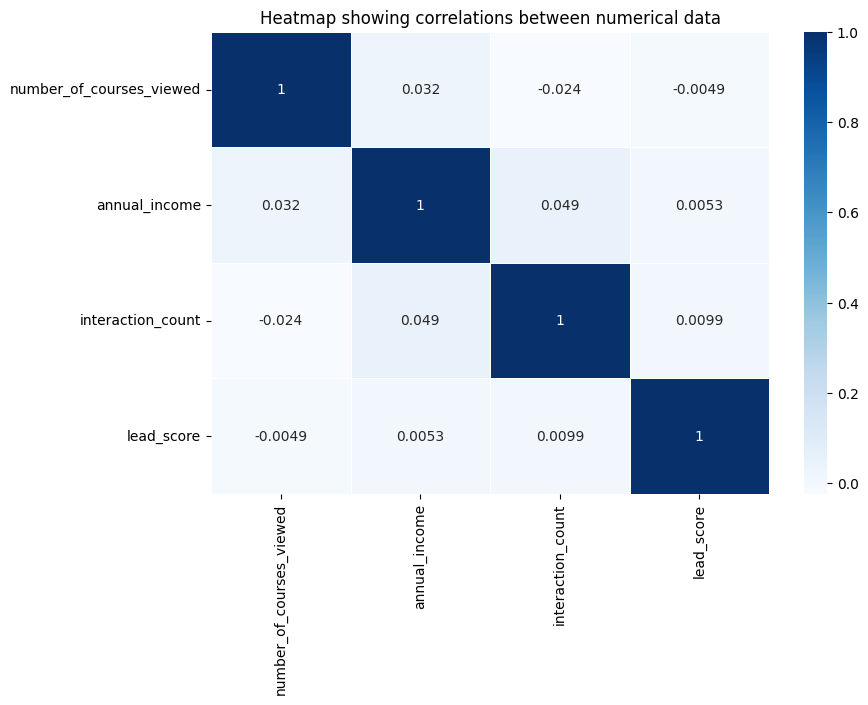

In [25]:
plt.figure(figsize=(9, 6))
sns.heatmap(data_numeric.corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

In [26]:
data_numeric.corr().unstack().sort_values(ascending=False)


number_of_courses_viewed  number_of_courses_viewed    1.000000
annual_income             annual_income               1.000000
lead_score                lead_score                  1.000000
interaction_count         interaction_count           1.000000
annual_income             interaction_count           0.048618
interaction_count         annual_income               0.048618
annual_income             number_of_courses_viewed    0.031551
number_of_courses_viewed  annual_income               0.031551
lead_score                interaction_count           0.009888
interaction_count         lead_score                  0.009888
annual_income             lead_score                  0.005334
lead_score                annual_income               0.005334
                          number_of_courses_viewed   -0.004879
number_of_courses_viewed  lead_score                 -0.004879
                          interaction_count          -0.023565
interaction_count         number_of_courses_viewed   -0

In [27]:
#Split the data
#Split your data in train/val/test sets with 60%/20%/20% distribution.
#Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
#Make sure that the target value converted is not in your dataframe.

In [55]:
from sklearn.metrics import mutual_info_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer


In [33]:
cat = ['lead_source', 'industry', 'employment_status', 'location']


In [34]:
SEED = 42


In [39]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=SEED)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=SEED)

assert len(df) == (len(df_train) + len(df_val) + len(df_test))

In [40]:
len(df_train), len(df_val), len(df_test)


(876, 293, 293)

In [41]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [42]:
y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

In [43]:
def calculate_mi(series):
    return mutual_info_score(series, df_train.converted)

In [44]:
df_mi = df_train[cat].fillna('NA').apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi

,MI
lead_source,0.035396
employment_status,0.012938
industry,0.011575
location,0.004464


In [45]:
df_train = df_train.drop('converted', axis=1)
df_val = df_val.drop('converted', axis=1)
df_test = df_test.drop('converted', axis=1)

assert 'converted' not in df_train.columns
assert 'converted' not in df_val.columns
assert 'converted' not in df_test.columns

In [46]:
numeric = ['number_of_courses_viewed', 'annual_income', 'interaction_count',
       'lead_score']

In [50]:
df_train[cat] = df_train[cat].fillna('NA')
df_train[numeric] = df_train[numeric].fillna(0)

dv = DictVectorizer(sparse=False)
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

In [52]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    C=1.0,
    max_iter=1000,
    random_state=42
)
model.fit(X_train, y_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [53]:
df_val[cat] = df_val[cat].fillna('NA')
df_val[numeric] = df_val[numeric].fillna(0)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict(X_val)

In [56]:
original_score = accuracy_score(y_val, y_pred)
original_score

0.8532423208191127

In [57]:
accuracy = np.round(original_score, 2)
print(f'Accuracy = {accuracy}')

Accuracy = 0.85


In [58]:
features = df_train.columns.to_list()
eliminate = [
 'industry',
 'employment_status',
 'lead_score']

In [59]:
scores = pd.DataFrame(columns=['eliminated_feature', 'accuracy', 'difference'])
for feature in eliminate:
    subset = features.copy()
    subset.remove(feature)
    
    dv = DictVectorizer(sparse=False)
    train_dict = df_train[subset].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    model = LogisticRegression(
        C=1,
        max_iter=1000,
        random_state=42
    )
    model.fit(X_train, y_train)
    
    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)
    
    y_pred = model.predict(X_val)
    score = accuracy_score(y_val, y_pred)
    
    scores.loc[len(scores)] = [feature, score, original_score - score]

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessi

In [60]:
scores


,eliminated_feature,accuracy,difference
0,industry,0.839590,0.013652
1,employment_status,0.832765,0.020478
2,lead_score,0.819113,0.034130


In [61]:
scores[scores.index == scores.difference.idxmin()]


,eliminated_feature,accuracy,difference
0,industry,0.83959,0.013652


In [62]:
y_train.shape, y_val.shape


((876,), (293,))

In [63]:
dv = DictVectorizer(sparse=False)
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [64]:
scores = {}
for C in [0.01, 0.1, 1, 10, 100]:
    model = LogisticRegression(
        max_iter=1000,
        C=C,
        random_state=SEED
    )
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    score = accuracy_score(y_val, y_pred)
    scores[C] = round(score, 3)
    print(f'C = {C}:\t Accuracy = {score}')

C = 0.01:	 Accuracy = 0.8122866894197952
C = 0.1:	 Accuracy = 0.8430034129692833


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C = 1:	 Accuracy = 0.8532423208191127
C = 10:	 Accuracy = 0.8532423208191127
C = 100:	 Accuracy = 0.8532423208191127


In [65]:
scores


{0.01: 0.812, 0.1: 0.843, 1: 0.853, 10: 0.853, 100: 0.853}

In [66]:
print(f'The best `C` is {max(scores, key=scores.get)}.')


The best `C` is 1.
